$\textbf{Modelo del votante (voter model)}$

El modelo del votante es un modelo fundamental en la dinamica de opinion en el sentido de que es uno de los modelos primordiales para empezar a entender tales dinamicas sociales , en terminos simples el modelo estudia la formacion de consensos respecto a una opinion en funcion de la probabilidad de cambiar de opinion infuenciados por la opinion de sus vecinos considerando 2 posibilidades con respecto a las opciones a elegir. 

El modelo se construye a partir de la primicia de que se tiene un sistema de dimension arbitraria aunque para efectos de nuestra simulacion se usara un sistema de dimension 2 con $N^{2}$ individuos lo cual en terminois graficos se trata de una malla de $N \times N$, en donde el cambio de la opinion de un individuo arbitrario de la malla esta dado por la funcion:

$$\omega_x(s)=\frac{1}{2}\left[1-\frac{s(x)}{z}\sum_{y\in \langle x \rangle} s(y)\right]$$

Donde $x$ es un lugar de la malla, $s(x)$ representa las posibles opiniones (binario) del individuo s asi el estudiar la evolucion de la probabilidad en el tiempo se tiene la distribución de probabilidad $P(s,t)$.

$$\frac{dP(s)}{dt}=-\sum_x \omega_x(s)P(s)+\sum_x \omega_x(s^x)P(s^x)$$


En donde $s^{x}$ es el mismo estado que $s$ excepto de que el individuo en el punto $x$ cambió de opinión. 

Se hara una $\textbf{simluacion}$ de este modelo bajo las variables de la malla bidimensional ya descritas con un $N=10$, se dispodran las variables iniciales de forma aleatoria respecto al voto de cada votante y luego se graficaran los estados iniciales y finiales de la malla asi como tambien la evolucion del consenso en el sistema. 

<ipython-input-3-77baef0e0681>:59: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "-b" (-> color='b'). The keyword argument will take precedence.
  ax3.plot(M/N**2,'-b',color='red')


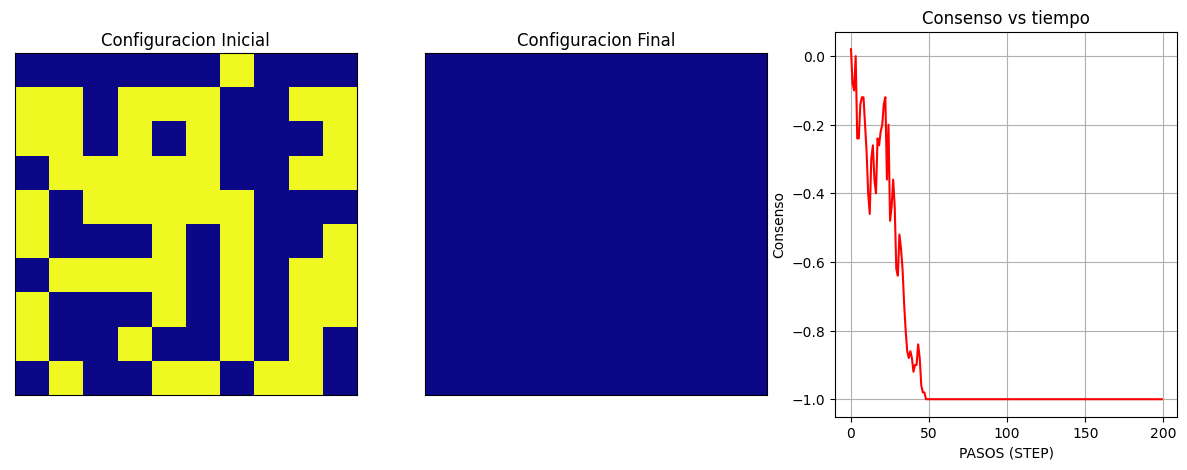

Tiempo ocupado (h:m:s:ns): 0:00:01.543000


In [3]:
# SIMULACION: MODELO DEL VOTANTE--------------------------------------------

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# INICIO CONTADOR TEMPORAL--------------------------------------------------- 
tini = datetime.now()

# CONDICIONES INICIALES-----------------------------------------------------
N=10 
steps = 200


curr_state = np.random.choice(np.array([-1,1]),size=(N,N))

# CONFIGURACION DE LA FIGURA-------------------------------------------------
fig, (ax1, ax2, ax3) = plt.subplots(nrows = 1, ncols = 3, figsize = (15, 5))

# ESTADO INICIAL DE LA FIGURA--------------------------------------------------
ax1.matshow(curr_state, cmap = plt.cm.plasma)
ax1.set_xticks([])
ax1.set_yticks([])
ax1.set_title("Configuracion Inicial")
# Dinamica
M = np.zeros(steps)
for i in range(steps):
   M[i] = np.sum(curr_state)

   # EVALUACION POR SPIN
   for n in range(N**2):
      # elige un espin en la posicion (i,j) aleatoriamente
      i, j = np.random.randint(N), np.random.randint(N)
      votante = curr_state[i,j]
      #vecinos
      #vecino = np.array([(i+1, j), (i-1, j), (i, j+1), (i, j-1)])
      vecino = np.array([curr_state[(i-1)%N, j], curr_state[(i+1)%N, j], curr_state[i, (j-1)%N], curr_state[i, (j+1)%N]])
      indice_vecino = np.random.choice(len(vecino))
      vecino_seleccionado = vecino[indice_vecino]
      
      #comparar vecino
      if votante != vecino_seleccionado:
          #votante = vecino_seleccionado
          votante = -1*curr_state[i, j]
      else:
          votante = curr_state[i, j]
     #actualizar estado
      curr_state[i, j] = votante          
          

#-----------------------------------------------
# Figura Estado Final
ax2.matshow(curr_state, cmap = plt.cm.plasma)
ax2.set_xticks([])
ax2.set_yticks([])
ax2.set_title("Configuracion Final")
#-----------------------------------------------
# Figura Magnetizacion
ax3.plot(M/N**2,'-b',color='red')
ax3.set_xlabel("PASOS (STEP)")
ax3.set_ylabel("Consenso")
ax3.set_title("Consenso vs tiempo")
ax3.grid(True)
#-----------------------
plt.show()
#===============================================================================================
# Fin contador temporal del programa
tfin = datetime.now()
dtie = tfin - tini
print('Tiempo ocupado (h:m:s:ns):', dtie)
